# GRACE Exogenous Variable Ranking

#### Loading necessary libraries and data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('basin_training_data_df_with_exog.csv')

In [3]:
#df_cmip6 = pd.read_csv('basin_training_data_df_with_exog_CMIP6.csv') THIS IS FOR THE SECOND SCENARIO (+ climate model variables)

In [4]:
# Instruction to show all rows and columns when printing dataframes 
pd.set_option("display.max_columns", None) 
pd.set_option("display.max_rows", None)

### Identification and Removal of Low Variance Variables

In [5]:
# Function to calculate the coefficient of variation (CV), using the absolute value of the mean
def calculate_cv(series):
    mean = series.mean()
    std_dev = series.std()
    if mean != 0:
        return std_dev / abs(mean)  # Use the absolute value of the mean
    else:
        return 0

# Calculate the coefficient of variation (CV) for each column in the dataframe
cv_values = df.apply(calculate_cv, axis=0)

# Define a threshold for the coefficient of variation (adjust as necessary)
threshold_cv = 0.01

# Identify columns with a coefficient of variation below the threshold
low_cv_cols = cv_values[cv_values < threshold_cv].index.drop('Year')

# Drop columns with low relative variance from the original dataframe
df = df.drop(columns=low_cv_cols)

### Data Standarization

#### Lags and steps are standardized within their basin_id

In [6]:
from sklearn.preprocessing import StandardScaler

# Dictionary to store scalers for each basin_id
scalers_dict = {}

# Create a copy of the dataframe to avoid altering the original data
df_scaled = df.copy()

# Columns for lags and steps to be scaled
lag_columns = ['lag_{}'.format(i) for i in range(1, 61)]
step_columns = ['step_{}'.format(i) for i in range(1, 61)]

# Iterate over each basin_id and scale the corresponding series
for basin in df['basin_id'].unique():
    # Filter rows corresponding to the current basin_id
    basin_mask = df['basin_id'] == basin
    
    # Create a scaler for each basin_id
    scaler = StandardScaler()
    
    # Apply scaling to lags and steps
    df.loc[basin_mask, lag_columns + step_columns] = scaler.fit_transform(df.loc[basin_mask, lag_columns + step_columns])
    
    # Store the scaler in the dictionary with basin_id as the key
    scalers_dict[basin] = scaler

#### The rest of variables are scaled respect to the rest of values of the column

In [7]:
# Identify columns that are neither lags, steps, nor basin_id (or any other columns you don't want to scale)
cols_to_exclude = ['basin_id'] + ['lag_{}'.format(i) for i in range(1, 61)] + ['step_{}'.format(i) for i in range(1, 61)]
columns_to_scale = [col for col in df.columns if col not in cols_to_exclude]

# Define the scaler
scaler = StandardScaler()

# Scale the remaining columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [8]:
df.head()

,lag_60,lag_59,lag_58,lag_57,lag_56,lag_55,lag_54,lag_53,lag_52,lag_51,lag_50,lag_49,lag_48,lag_47,lag_46,lag_45,lag_44,lag_43,lag_42,lag_41,lag_40,lag_39,lag_38,lag_37,lag_36,lag_35,lag_34,lag_33,lag_32,lag_31,lag_30,lag_29,lag_28,lag_27,lag_26,lag_25,lag_24,lag_23,lag_22,lag_21,lag_20,lag_19,lag_18,lag_17,lag_16,lag_15,lag_14,lag_13,lag_12,lag_11,lag_10,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,step_1,step_2,step_3,step_4,step_5,step_6,step_7,step_8,step_9,step_10,step_11,step_12,step_13,step_14,step_15,step_16,step_17,step_18,step_19,step_20,step_21,step_22,step_23,step_24,step_25,step_26,step_27,step_28,step_29,step_30,step_31,step_32,step_33,step_34,step_35,step_36,step_37,step_38,step_39,step_40,step_41,step_42,step_43,step_44,step_45,step_46,step_47,step_48,step_49,step_50,step_51,step_52,step_53,step_54,step_55,step_56,step_57,step_58,step_59,step_60,basin_id,hist_mean,hist_max,hist_min,hist_std,hist_vc,mean_past_year,max_past_year,min_past_year,mean_past_quarter,max_past_quarter,min_past_quarter,pct_diff_meanlast12_meanhist,otm_hist_0,otm_hist_1,otm_hist_2,otm_hist_3,otm_hist_4,otm_hist_5,otm_hist_6,otm_hist_7,otm_hist_8,otm_hist_9,otm_hist_10,otm_hist_11,Year,Month,Month_sin,is_Winter,is_Spring,is_Summer,is_Autumn,100m_u_component_of_wind_past_historic_mean,100m_u_component_of_wind_past_historic_max,100m_u_component_of_wind_past_historic_min,100m_u_component_of_wind_mean_past_year,100m_u_component_of_wind_max_past_year,100m_u_component_of_wind_min_past_year,100m_u_component_of_wind_mean_past_quarter,100m_u_component_of_wind_max_past_quarter,100m_u_component_of_wind_min_past_quarter,100m_u_component_of_wind_mean_past_5years,100m_u_component_of_wind_max_past_5years,100m_u_component_of_wind_min_past_5years,100m_u_component_of_wind_pct_diff_meanlast12_meanhist,100m_v_component_of_wind_past_historic_mean,100m_v_component_of_wind_past_historic_max,100m_v_component_of_wind_past_historic_min,100m_v_component_of_wind_mean_past_year,100m_v_component_of_wind_max_past_year,100m_v_component_of_wind_min_past_year,100m_v_component_of_wind_mean_past_quarter,100m_v_component_of_wind_max_past_quarter,100m_v_component_of_wind_min_past_quarter,100m_v_component_of_wind_mean_past_5years,100m_v_component_of_wind_max_past_5years,100m_v_component_of_wind_min_past_5years,100m_v_component_of_wind_pct_diff_meanlast12_meanhist,10m_u_component_of_wind_past_historic_mean,10m_u_component_of_wind_past_historic_max,10m_u_component_of_wind_past_historic_min,10m_u_component_of_wind_mean_past_year,10m_u_component_of_wind_max_past_year,10m_u_component_of_wind_min_past_year,10m_u_component_of_wind_mean_past_quarter,10m_u_component_of_wind_max_past_quarter,10m_u_component_of_wind_min_past_quarter,10m_u_component_of_wind_mean_past_5years,10m_u_component_of_wind_max_past_5years,10m_u_component_of_wind_min_past_5years,10m_u_component_of_wind_pct_diff_meanlast12_meanhist,10m_v_component_of_wind_past_historic_mean,10m_v_component_of_wind_past_historic_max,10m_v_component_of_wind_past_historic_min,10m_v_component_of_wind_mean_past_year,10m_v_component_of_wind_max_past_year,10m_v_component_of_wind_min_past_year,10m_v_component_of_wind_mean_past_quarter,10m_v_component_of_wind_max_past_quarter,10m_v_component_of_wind_min_past_quarter,10m_v_component_of_wind_mean_past_5years,10m_v_component_of_wind_max_past_5years,10m_v_component_of_wind_min_past_5years,10m_v_component_of_wind_pct_diff_meanlast12_meanhist,10m_wind_speed_past_historic_mean,10m_wind_speed_past_historic_max,10m_wind_speed_past_historic_min,10m_wind_speed_mean_past_year,10m_wind_speed_max_past_year,10m_wind_speed_min_past_year,10m_wind_speed_mean_past_quarter,10m_wind_speed_max_past_quarter,10m_wind_speed_min_past_quarter,10m_wind_speed_mean_past_5years,10m_wind_speed_max_past_5years,10m_wind_speed_min_past_5years,10m_wind_speed_pct_diff_meanlast12_meanhist,2m_dewpoint_temperature_past_historic_mean,2m_dewpoint_temperature_past_historic_max,2m_dewpoint_temperature_past_historic_min,2m_dewpo

### Multicollinearity Elimination (Highly Correlated Variables)

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr().abs()  # Absolute correlation to ignore signs

# Set a correlation threshold (adjust as necessary)
threshold_corr = 0.9

# Generate a mask to get only the upper triangle of the matrix (avoiding duplicates and the diagonal)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify variable pairs that have a correlation higher than the threshold
high_corr_pairs = [(column, idx, upper.loc[column, idx]) for column in upper.columns for idx in upper.index if upper.loc[column, idx] > threshold_corr]

# Create a DataFrame to display the most correlated variable pairs
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

# Sort the pairs by correlation value from highest to lowest
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)

In [10]:
high_corr_df.head()

,Variable 1,Variable 2,Correlation
5486,soil_type_max_past_year,soil_type_mean_past_5years,1.0
5493,soil_type_min_past_year,soil_type_max_past_5years,1.0
5501,soil_type_max_past_quarter,soil_type_mean_past_5years,1.0
5500,soil_type_max_past_quarter,soil_type_min_past_quarter,1.0
1846,geopotential_past_historic_max,geopotential_mean_past_quarter,1.0


In [11]:
# Empty list to store variables to be removed
variables_to_remove = []

# Iterate over each row of the high_corr_df
for index, row in high_corr_df.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    
    # Check if either of the two variables is already in the removal list
    if var1 not in variables_to_remove and var2 not in variables_to_remove:
        # Add one of the two (we consistently choose var1)
        variables_to_remove.append(var1)

In [12]:
len(variables_to_remove)

662

In [13]:
# Remove the selected variables from the original dataframe
df = df.drop(columns=variables_to_remove)

## Fitting of the 60 independent models (one that predicts the values of each step)

Before calculating feature importance, we need to fit a model that can accurately predict the targets. For this, we choose Catboost and train several hyperparameter combinations. We will fit 60 independent models, one for each step, as well as a single multioutput model. Let's start with the 60 independent models.

In [14]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error

# Define a discrete hyperparameter grid for CatBoost
param_grid = {
    'depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300],
    'border_count': [32, 64, 128]
}

# Define the evaluation metric as RMSE (Root Mean Squared Error)
scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Initialize a dictionary to store the best hyperparameters for each step
best_params_per_step = {}

# Define 60 steps as the target variables (step_1, ..., step_60)
steps = [f'step_{i}' for i in range(1, 61)]

# Extract the feature set, excluding the target step columns
X = df.drop(columns=[f'step_{i}' for i in range(1, 61)])  

# Loop through each step to find the best hyperparameters
for step in steps:
    print(f"Searching for best hyperparameters for {step}...")

    # Remove rows with NaN values in the current step
    df_no_nan = df.dropna(subset=[step])
    
    # Split the data into training and testing sets, stratified by 'basin_id'
    X_train, X_test, y_train, y_test = train_test_split(
        X.loc[df_no_nan.index], df_no_nan[step], 
        test_size=0.2, stratify=df_no_nan['basin_id'], random_state=42
    )

    # Define the base model as CatBoostRegressor
    model = CatBoostRegressor(verbose=False, task_type='CPU', thread_count=-1, loss_function="RMSE")

    # Configure RandomizedSearchCV to search for the best hyperparameter combinations
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=20,  # Number of hyperparameter combinations to test
        scoring=scorer,
        cv=7,  # 7-fold cross-validation
        verbose=0,
        random_state=None,
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the model and search for the best hyperparameter combination
    random_search.fit(X_train, y_train)

    # Store the best hyperparameters for the current step
    best_params_per_step[step] = random_search.best_params_

    print(f"Best hyperparameters for {step}: {random_search.best_params_}\n")

# Convert the dictionary of best hyperparameters to a DataFrame for better visualization
best_params_df = pd.DataFrame(best_params_per_step).T
best_params_df

# Display the best hyperparameters for each step
display(best_params_df)

Buscando los mejores hiperparámetros para step_1...
Mejores hiperparámetros para step_1: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 6, 'border_count': 64}

Buscando los mejores hiperparámetros para step_2...
Mejores hiperparámetros para step_2: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 6, 'border_count': 32}

Buscando los mejores hiperparámetros para step_3...
Mejores hiperparámetros para step_3: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 6, 'border_count': 32}

Buscando los mejores hiperparámetros para step_4...
Mejores hiperparámetros para step_4: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 6, 'border_count': 32}

Buscando los mejores hiperparámetros para step_5...
Mejores hiperparámetros para step_5: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 6, 'border_count': 64}

Buscando los mejores hiperparámetros para step_6...
Mejores hiperparámetros para step_6: {

,learning_rate,l2_leaf_reg,iterations,depth,border_count
step_1,0.10,1.0,300.0,6.0,64.0
step_2,0.10,5.0,300.0,6.0,32.0
step_3,0.10,3.0,300.0,6.0,32.0
step_4,0.10,1.0,300.0,6.0,32.0
step_5,0.10,1.0,300.0,6.0,64.0
step_6,0.10,3.0,300.0,6.0,128.0
step_7,0.10,1.0,200.0,6.0,32.0
step_8,0.10,3.0,300.0,5.0,64.0
step_9,0.10,3.0,300.0,5.0,64.0
step_10,0.10,1.0,200.0,5.0,64.0


### Varaiable CPPM calculation for the independent models

We now calculate part of the final the CPPM metric. (The definition of the metric can be found at the bottom of this notebook)

In [15]:
# Import necessary libraries
import catboost as cb
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import shap

# Function to normalize scores
def normalize(score):
    return (score - np.min(score)) / (np.max(score) - np.min(score))

# Function to check and handle NaN or extreme values in the target
def clean_target(y):
    # Replace NaN or infinite values with the mean of the column
    y_cleaned = y.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
    y_cleaned = y_cleaned.fillna(y_cleaned.mean())  # Replace NaN with the mean
    return y_cleaned

# Class to compute the Combined Predictive Power Metric
class CombinedPredictivePowerMetric:
    def __init__(self, params, weights=None):
        self.params = params  # Best hyperparameters for the current step
        self.weights = weights if weights is not None else [0.33, 0.34, 0.33]  # Equal weights by default

    def fit(self, X, y, basin_id):
        # Clean the target variable
        y_cleaned = clean_target(y)

        # Perform stratified sampling by basin_id
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_cleaned, test_size=0.2, random_state=42, stratify=basin_id
        )

        # Initialize CatBoost model with the best parameters for the current step
        model = cb.CatBoostRegressor(**self.params, verbose=False, task_type='CPU', thread_count=-1)

        # Fit the model
        model.fit(X_train, y_train)

        # 1. Feature Importance in CatBoost
        feature_importance = model.get_feature_importance()
        S_FI = feature_importance

        # 2. SHAP values
        explainer = shap.Explainer(model)
        shap_values = explainer(X_test)
        S_SHAP = np.abs(shap_values.values).mean(axis=0)

        # 3. Recursive Feature Elimination (RFE) with stratified sampling (40%)
        X_rfe_train, _, y_rfe_train, _ = train_test_split(
            X_train, y_train, test_size=0.6, random_state=42, stratify=basin_id.loc[X_train.index]
        )
        rfe = RFE(model, n_features_to_select=1)
        rfe.fit(X_rfe_train, y_rfe_train)

        # Instead of using raw ranking, we calculate relative importance based on model performance after removal.
        rfe_performance_drop = model.score(X_rfe_train, y_rfe_train) - rfe.score(X_rfe_train, y_rfe_train)
        S_RFE = (1 / rfe.ranking_) * rfe_performance_drop  # Inverse ranking scaled by performance drop

        # Normalize all scores
        S_FI_norm = normalize(S_FI)
        S_SHAP_norm = normalize(S_SHAP)
        S_RFE_norm = normalize(S_RFE)

        # Combined Predictive Power Metric
        M = (
            self.weights[0] * S_FI_norm +
            self.weights[1] * S_SHAP_norm +
            self.weights[2] * S_RFE_norm
        )

        # Store results in DataFrame for better visualization
        self.results_ = pd.DataFrame({
            'Feature': X.columns,
            'S_FI_norm': S_FI_norm,
            'S_SHAP_norm': S_SHAP_norm,
            'S_RFE_norm': S_RFE_norm,
            'CPPM': M
        })

        return self.results_

# Function to evaluate each step (step_1, ..., step_60)
def evaluate_steps(X, df, basin_id, best_params_per_step, step_range=60):
    results_per_step = {}

    # Iterate over each step
    for step in range(1, step_range + 1):
        print(f"Evaluating for step_{step}...")

        # Target variable for the current step
        y = df[f'step_{step}']

        # Get the best hyperparameters for the current step
        best_params = best_params_per_step[f'step_{step}']

        # Initialize the Combined Predictive Power Metric class with the best params for this step
        cppm = CombinedPredictivePowerMetric(params=best_params)

        # Fit the model and calculate the Combined Predictive Power Metric for the current step
        results = cppm.fit(X, y, basin_id).sort_values(by = ['CPPM'], ascending=False)

        # Store results for the current step
        results_per_step[f'step_{step}'] = results
        
        # If the folder doesn't exist, we create it
        if not os.path.exists('CPPM_results'):
            os.makedirs('CPPM_results')
        
        # Save file for the current step
        results.to_csv(os.path.join('CPPM_results', f'CPPM_step_{step}.csv'), index=False)

    return results_per_step

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [16]:
# Extract the basin_id column for stratification purposes
basin_id = df['basin_id']

# Execute the evaluation process for each step using the best hyperparameters found for each step
results_per_step = evaluate_steps(X, df, basin_id, best_params_per_step, step_range=60)

# Loop through the results to save or analyze them later. For demonstration, only 'step_1' and 'step_2' are displayed.
for step, result in results_per_step.items():
    if step in ['step_1', 'step_2']:  # Displaying results for the first two steps
        print(f"\nResults for {step}:")
        display(result)  # Displaying the result for the current step

Evaluating for step_1...
Evaluating for step_2...
Evaluating for step_3...
Evaluating for step_4...
Evaluating for step_5...
Evaluating for step_6...
Evaluating for step_7...
Evaluating for step_8...
Evaluating for step_9...
Evaluating for step_10...
Evaluating for step_11...
Evaluating for step_12...
Evaluating for step_13...
Evaluating for step_14...
Evaluating for step_15...
Evaluating for step_16...
Evaluating for step_17...
Evaluating for step_18...
Evaluating for step_19...
Evaluating for step_20...
Evaluating for step_21...
Evaluating for step_22...
Evaluating for step_23...
Evaluating for step_24...
Evaluating for step_25...
Evaluating for step_26...
Evaluating for step_27...
Evaluating for step_28...
Evaluating for step_29...
Evaluating for step_30...
Evaluating for step_31...
Evaluating for step_32...
Evaluating for step_33...
Evaluating for step_34...
Evaluating for step_35...
Evaluating for step_36...
Evaluating for step_37...
Evaluating for step_38...
Evaluating for step_3

,Feature,S_FI_norm,S_SHAP_norm,S_RFE_norm,CPPM
59,lag_1,1.000000,1.000000,1.000000,1.000000
71,otm_hist_1,0.194619,0.311126,0.498276,0.334438
82,Year,0.338954,0.243290,0.247414,0.276220
49,lag_11,0.157139,0.246527,0.331034,0.244916
48,lag_12,0.141900,0.291396,0.197241,0.210991
68,min_past_quarter,0.119263,0.185874,0.139901,0.148721
50,lag_10,0.112782,0.159451,0.108046,0.127087
24,lag_36,0.092904,0.192739,0.068227,0.118704
25,lag_35,0.061073,0.168735,0.096897,0.109500
261,total_precipitation_pct_diff_meanlast12_meanhist,0.041154,0.079750,0.163793,0.094747



Resultados para step_2:


,Feature,S_FI_norm,S_SHAP_norm,S_RFE_norm,CPPM
59,lag_1,0.849587,1.000000,0.498276,0.784795
72,otm_hist_2,0.360456,0.601164,1.000000,0.653346
82,Year,1.000000,0.566397,0.247414,0.604221
49,lag_11,0.599647,0.618043,0.331034,0.517259
50,lag_10,0.554264,0.654767,0.163793,0.459580
25,lag_35,0.320511,0.707120,0.068227,0.368704
67,max_past_quarter,0.360965,0.325224,0.197241,0.294784
71,otm_hist_1,0.272807,0.387035,0.139901,0.267786
14,lag_46,0.139258,0.273411,0.096897,0.170891
261,total_precipitation_pct_diff_meanlast12_meanhist,0.127947,0.212081,0.121983,0.154585


## We repete the process for the multioutput model

### First the hyperparameter search

In [18]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import pandas as pd

# Define a grid of hyperparameters for CatBoost model
param_grid = {
    'depth': [3, 4, 5],  # Tree depth (controls complexity of the model)
    'learning_rate': [0.01, 0.05, 0.1],  # Step size during optimization
    'l2_leaf_reg': [1, 3, 5],  # Regularization to prevent overfitting
    'iterations': [100, 200, 250],  # Number of boosting iterations
    'border_count': [32, 64, 128]  # Number of splits for numerical features
}

# Define the evaluation metric as Root Mean Squared Error (RMSE)
scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Prepare the dataset by filling missing values for the steps with their mean
df_no_nan = df.copy()
df_no_nan[[f'step_{i}' for i in range(1, 61)]] = df[[f'step_{i}' for i in range(1, 61)]].fillna(df[[f'step_{i}' for i in range(1, 61)]].mean())

# Separate features (X) from target variables (y) which include multi-output steps (step_1, ..., step_60)
X = df_no_nan.drop(columns=[f'step_{i}' for i in range(1, 61)])  # Features excluding steps
y = df_no_nan[[f'step_{i}' for i in range(1, 61)]]  # Targets: future steps

# Split the data into training and test sets, stratified by 'basin_id' for balanced splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.2, stratify=df_no_nan['basin_id'], random_state=42
)

# Define the base CatBoost model for multioutput regression with RMSE as the loss function
model = CatBoostRegressor(
    verbose=False,  # Suppress output during training
    task_type='CPU',  # Ensure the model runs on the CPU
    thread_count=-1,  # Utilize all available CPU threads
    loss_function="MultiRMSE"  # Loss function for multioutput regression
)

# Use RandomizedSearchCV to find the optimal combination of hyperparameters
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,  # Hyperparameter grid to search
    n_iter=10,  # Number of random combinations to test
    scoring=scorer,  # Evaluation metric (RMSE)
    cv=6,  # Cross-validation with 6 folds
    verbose=0,  # Suppress output
    random_state=42,  # Ensures reproducibility
    n_jobs=-1  # Use all available cores for parallelism
)

# Fit the model and search for the best hyperparameter combination
random_search.fit(X_train, y_train)

# Retrieve the best hyperparameters from the search
best_params = random_search.best_params_
print(f"Best hyperparameters for the multioutput model: {best_params}\n")

# Save the best estimator (model with the best hyperparameters)
best_model = random_search.best_estimator_

# Display the best hyperparameters in a DataFrame for better visualization
best_params_df = pd.DataFrame([best_params])
display(best_params_df)

Mejores hiperparámetros para el modelo multioutput: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 200, 'depth': 5, 'border_count': 64}



,learning_rate,l2_leaf_reg,iterations,depth,border_count
0,0.1,5,200,5,64


### We check the resulting predictions

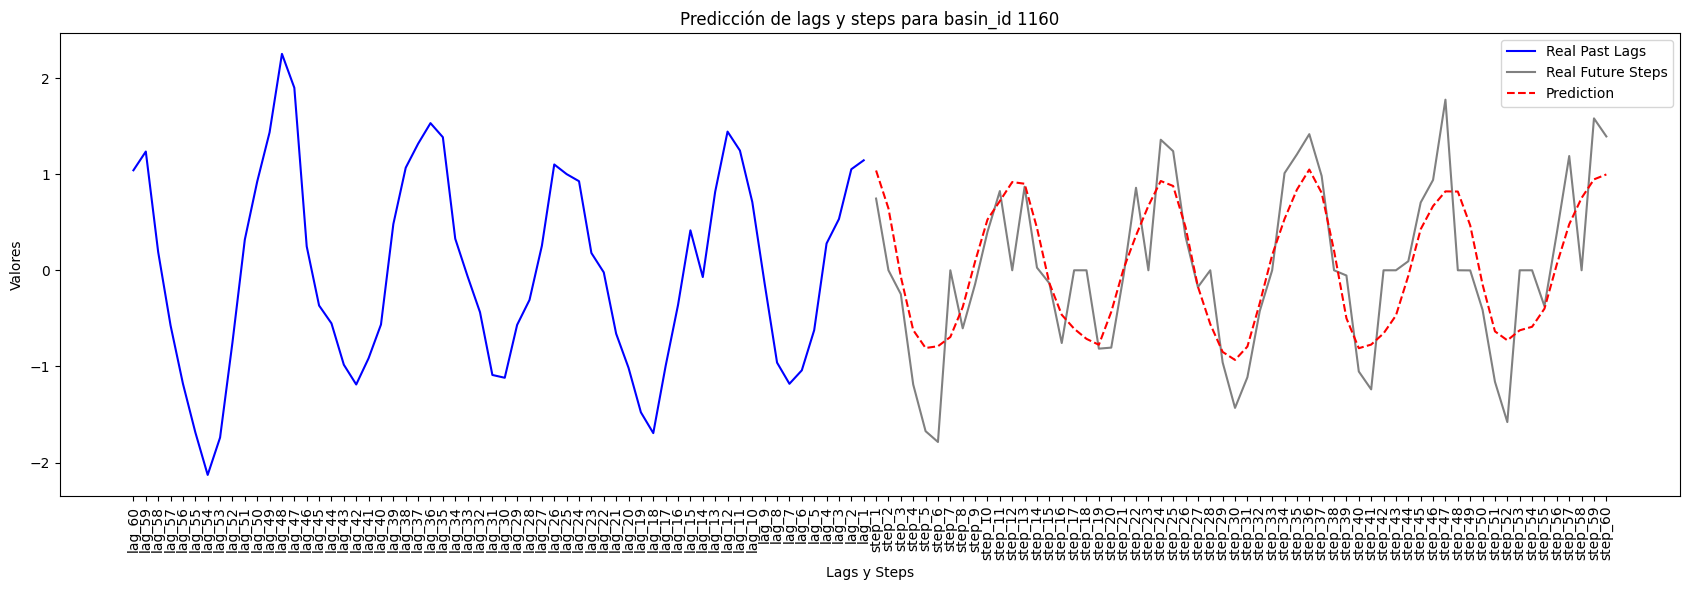

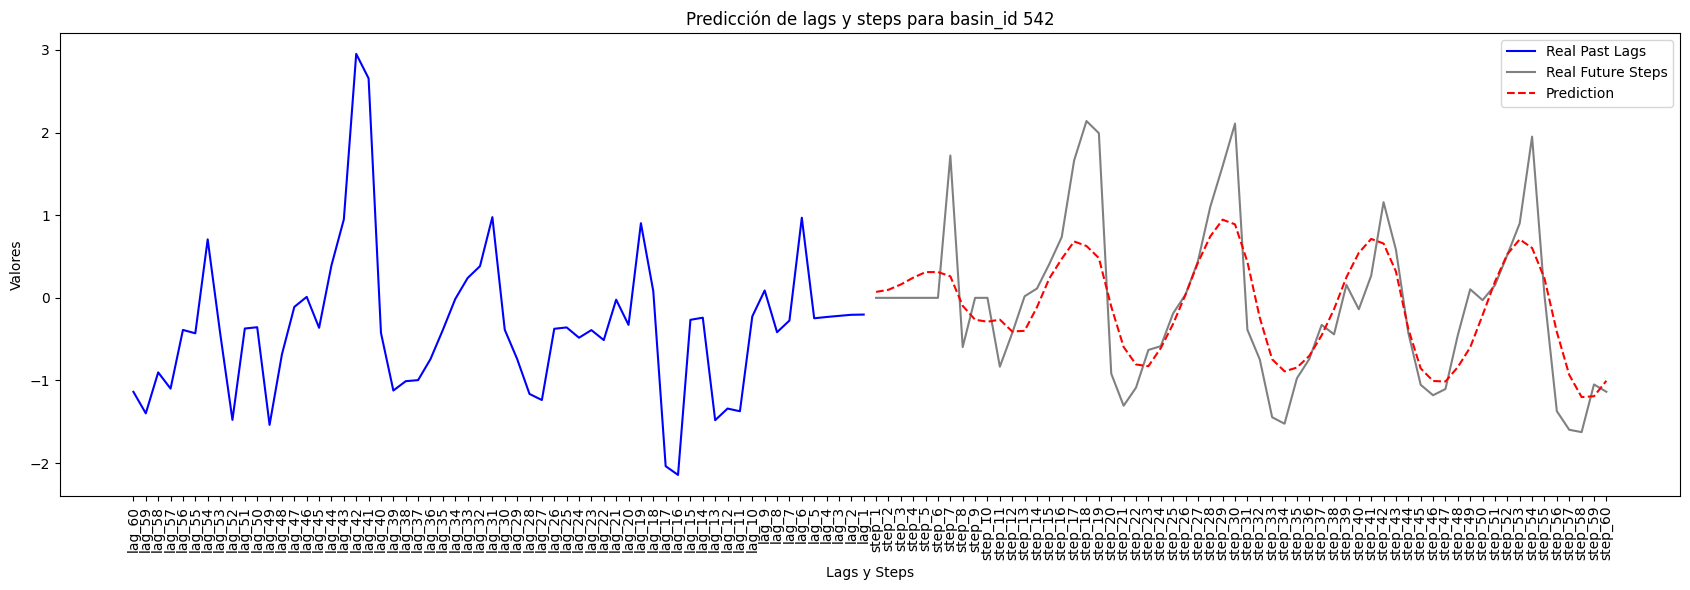

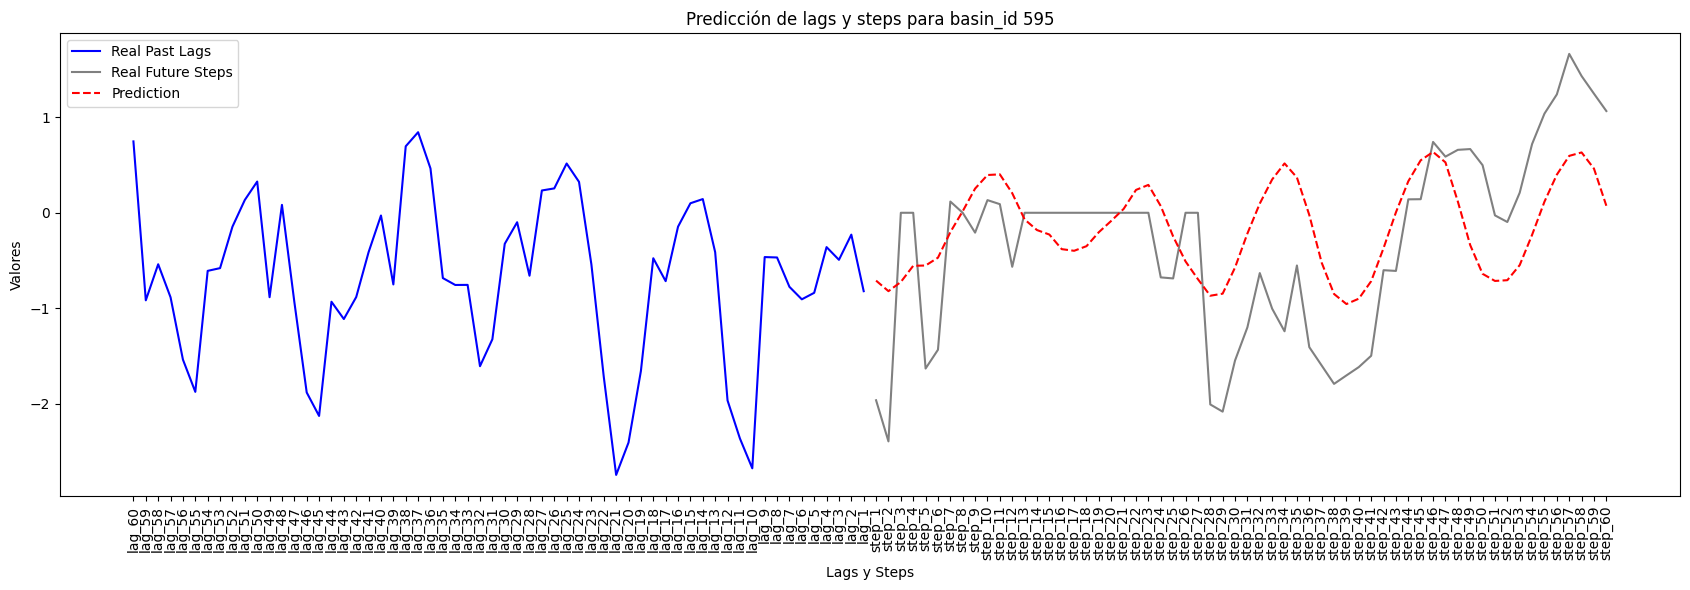

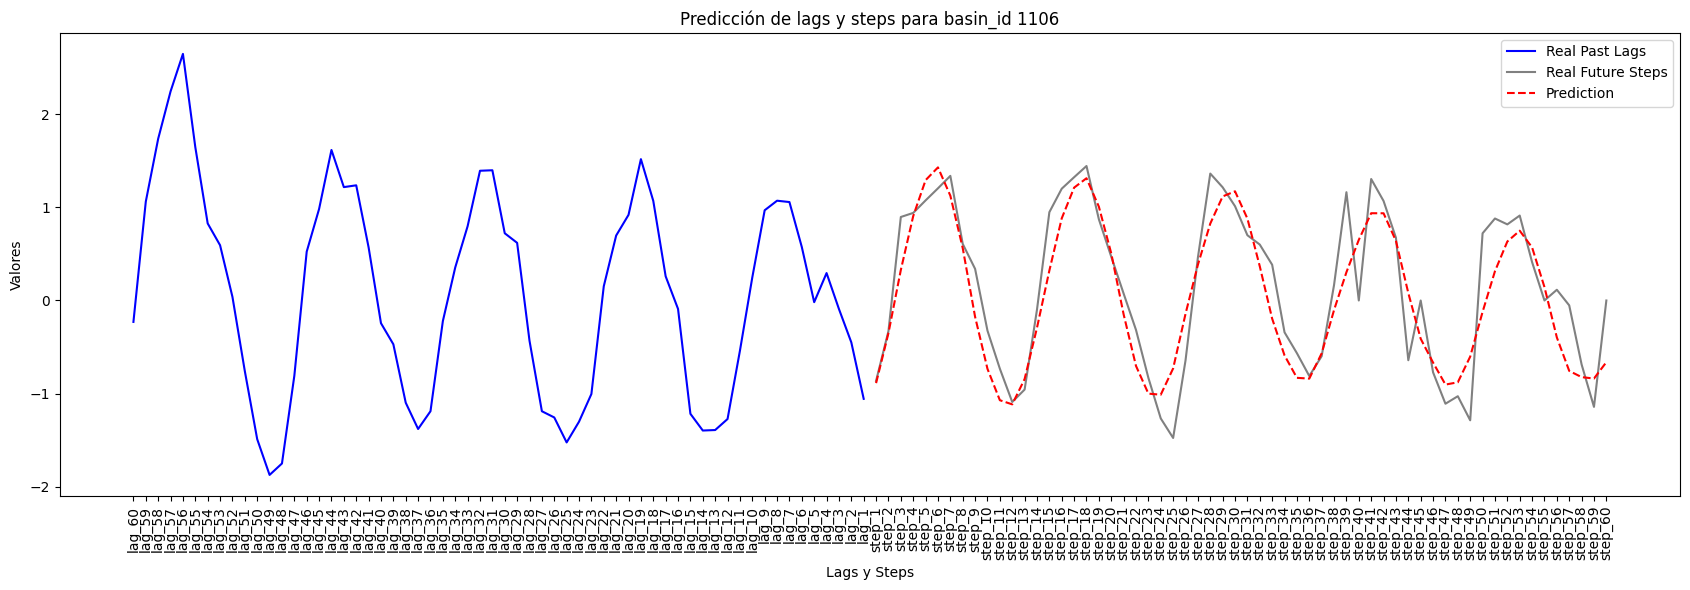

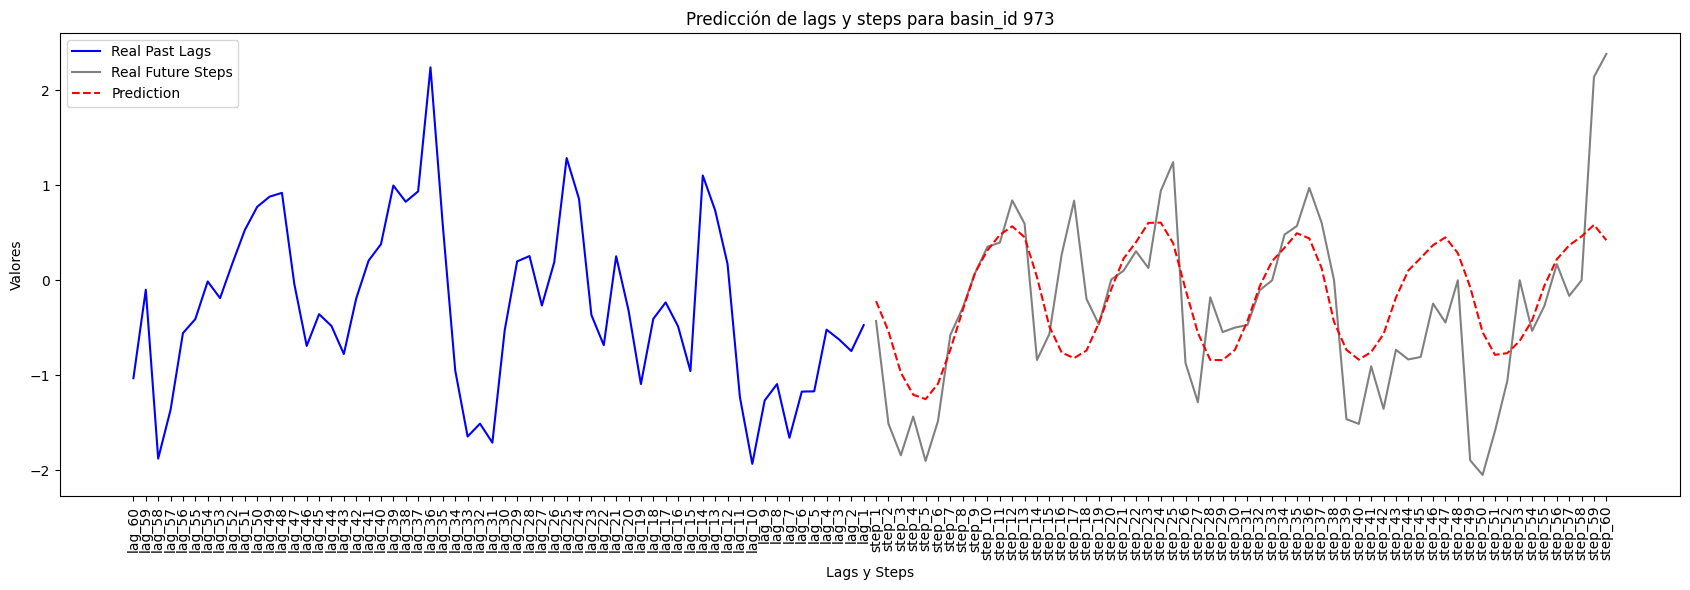

In [23]:
import matplotlib.pyplot as plt

# Assume that lags are stored in the X_test DataFrame
lags = [f'lag_{i}' for i in range(60, 0, -1)]  # Create lag features: lag_60, lag_59, ..., lag_1
steps = [f'step_{i}' for i in range(1, 61)]  # Create step features: step_1, step_2, ..., step_60

# Visualize predictions for a specific basin_id (in this example, we select 5 samples starting from index 42)
num_samples_to_plot = 5  # Define the number of samples to visualize
for i in range(42, 42 + num_samples_to_plot):
    basin_id_sample = X_test['basin_id'].iloc[i]  # Extract basin_id for the current sample
    y_pred = best_model.predict(X_test)  # Predict future steps using the trained model
    
    # Extract the lags and true future steps for the selected basin_id
    y_lags_sample = X_test[lags].iloc[i, :]  # Extract the lags for the current sample
    y_true_sample = y_test.iloc[i, :]  # Extract the true future steps (step_1, ..., step_60)
    y_pred_sample = y_pred[i, :]  # Extract the predicted future steps

    # Create a simplified plot that shows real past lags, true future steps, and predicted future steps
    plt.figure(figsize=(17, 6))
    plt.plot(y_lags_sample.index, y_lags_sample.values, label='Real Past Lags', color='blue', linestyle='-', marker='')
    plt.plot(y_true_sample.index, y_true_sample.values, label='Real Future Steps', color='grey', linestyle='-', marker='')
    plt.plot(y_true_sample.index, y_pred_sample, label='Prediction', color='red', linestyle='--', marker='')

    # Add labels and title
    plt.title(f'Prediction of Lags and Steps for basin_id {basin_id_sample}')
    plt.xlabel('Lags and Steps')
    plt.ylabel('Values')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.legend()  # Add legend to differentiate between true and predicted values
    plt.grid(False)  # Disable grid lines for a cleaner plot
    plt.tight_layout()  # Adjust layout to prevent clipping

    # Display the plot
    plt.show()

### CPPM calculation for the multioutput case

In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import catboost as cb
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Function to normalize scores
def normalize(score):
    return (score - np.min(score)) / (np.max(score) - np.min(score))

# Function to check and handle NaN or extreme values in the target
def clean_target(y):
    # Replace NaN or infinite values with the mean of the column
    y_cleaned = y.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
    y_cleaned = y_cleaned.fillna(y_cleaned.mean())  # Replace NaN with the mean
    return y_cleaned

# Modificación para el manejo de modelos multioutput
class CombinedPredictivePowerMetricMultiOutput:
    def __init__(self, model, weights=None):
        self.model = model  # CatBoost multioutput model in this case
        self.weights = weights if weights is not None else [0.33, 0.34, 0.33]  # Equal weights by default

    def fit(self, X, y, basin_id):
        # Clean the target variable (multioutput)
        y_cleaned = clean_target(y)

        # Perform stratified sampling by basin_id
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_cleaned, test_size=0.2, random_state=42, stratify=basin_id
        )

        # Fit the base model
        self.model.fit(X_train, y_train)

        # 1. Feature Importance in CatBoost for multioutput
        feature_importance = self.model.get_feature_importance()
        S_FI = feature_importance  # Feature importance is shared across all outputs

        # 2. SHAP values for multioutput
        explainer = shap.Explainer(self.model)
        shap_values = explainer(X_test)

        # For multioutput, we calculate the mean SHAP value across all outputs and samples
        S_SHAP = np.abs(shap_values.values).mean(axis=(0, 2))  # Mean across samples and steps (outputs)

        # 3. Recursive Feature Elimination (RFE) with stratified sampling (40%) for multioutput
        X_rfe_train, _, y_rfe_train, _ = train_test_split(
            X_train, y_train, test_size=0.6, random_state=42, stratify=basin_id.loc[X_train.index]
        )
        rfe = RFE(self.model, n_features_to_select=1)
        rfe.fit(X_rfe_train, y_rfe_train)

        # Instead of using raw ranking, we calculate relative importance based on model performance after removal.
        rfe_performance_drop = self.model.score(X_rfe_train, y_rfe_train) - rfe.score(X_rfe_train, y_rfe_train)
        S_RFE = (1 / rfe.ranking_) * rfe_performance_drop  # Inverse ranking scaled by performance drop

        # Normalize all scores
        S_FI_norm = normalize(S_FI)
        S_SHAP_norm = normalize(S_SHAP)
        S_RFE_norm = normalize(S_RFE)

        # Ensure that all arrays have the same shape (i.e., the number of features)
        if S_FI_norm.shape != S_SHAP_norm.shape:
            raise ValueError("Feature Importance and SHAP scores have different shapes")
        
        # Combined Predictive Power Metric for multioutput
        M = (
            self.weights[0] * S_FI_norm +
            self.weights[1] * S_SHAP_norm +
            self.weights[2] * S_RFE_norm
        )

        # Store results in DataFrame for better visualization
        self.results_ = pd.DataFrame({
            'Feature': X.columns,
            'S_FI_norm': S_FI_norm,
            'S_SHAP_norm': S_SHAP_norm,
            'S_RFE_norm': S_RFE_norm,
            'CPPM': M
        })

        return self.results_
        
# Function to evaluate CPPM for the multioutput model
def evaluate_multioutput(X, df, basin_id, model):
    print("Evaluating the multioutput model...")

    # Target variables (multioutput: step_1, ..., step_60)
    y = df[[f'step_{i}' for i in range(1, 61)]]

    # Initialize the Combined Predictive Power Metric class with the multioutput model
    cppm = CombinedPredictivePowerMetricMultiOutput(model=model)

    # Fit the model and calculate the Combined Predictive Power Metric
    results = cppm.fit(X, y, basin_id).sort_values(by=['CPPM'], ascending=False)

    # Display the results
    display(results)

    return results

In [27]:
# Evaluating the multioutput model using the CPPM metric
multioutput_results = evaluate_multioutput(X, df, df['basin_id'], best_model)

Evaluating the multioutput model...


,Feature,S_FI_norm,S_SHAP_norm,S_RFE_norm,CPPM
82,Year,1.000000,1.000000,0.247414,0.751647
72,otm_hist_2,0.146957,0.405177,1.000000,0.516256
75,otm_hist_5,0.175360,0.426854,0.498276,0.367430
80,otm_hist_10,0.155173,0.490098,0.331034,0.327082
73,otm_hist_3,0.244897,0.595113,0.096897,0.315130
59,lag_1,0.170921,0.532805,0.163793,0.291609
77,otm_hist_7,0.185041,0.430910,0.197241,0.272663
70,otm_hist_0,0.168477,0.585084,0.052299,0.271785
71,otm_hist_1,0.186095,0.512856,0.073740,0.260117
74,otm_hist_4,0.184615,0.508678,0.055578,0.252214


## Computation of the final results

### Partial Result for the 60 independent models part

In [32]:
# Directory where CPPM results are stored
input_dir = 'CPPM_results'

# Initialize a dictionary to store CPPM values for each feature
cppm_dict = {}

# Load all CSV files that follow the naming pattern 'CPPM_step_{step}.csv'
for step in range(1, 61):
    file_path = os.path.join(input_dir, f'CPPM_step_{step}.csv')
    
    if os.path.exists(file_path):
        # Load the CSV file for the current step
        df = pd.read_csv(file_path)
        
        # Iterate through each row of the DataFrame to update CPPM values
        for index, row in df.iterrows():
            feature = row['Feature']
            cppm_value = row['CPPM']
            
            # If the feature is not yet in the dictionary, initialize it
            if feature not in cppm_dict:
                cppm_dict[feature] = []
            
            # Add the current step's CPPM value for the feature
            cppm_dict[feature].append(cppm_value)

# Calculate the average CPPM value for each feature across all steps
cppm_avg = {feature: sum(values) / len(values) for feature, values in cppm_dict.items()}

# Create a DataFrame with two columns: Feature and the average CPPM value, sorted in descending order of CPPM
cppm_avg_df = pd.DataFrame(list(cppm_avg.items()), columns=['Feature', 'CPPM']).sort_values(by=['CPPM'], ascending=False)

# Display the resulting DataFrame
display(cppm_avg_df)

,Feature,CPPM
2,Year,0.715400
0,lag_1,0.145573
1,otm_hist_1,0.136092
36,otm_hist_2,0.128063
189,otm_hist_4,0.126373
58,otm_hist_8,0.125113
157,otm_hist_9,0.124413
117,otm_hist_3,0.122233
154,otm_hist_5,0.120805
107,otm_hist_10,0.116440


### Partial Result for the multioutput model part

In [31]:
multioutput_results[['Feature', 'CPPM']]

,Feature,CPPM
82,Year,0.751647
72,otm_hist_2,0.516256
75,otm_hist_5,0.367430
80,otm_hist_10,0.327082
73,otm_hist_3,0.315130
59,lag_1,0.291609
77,otm_hist_7,0.272663
70,otm_hist_0,0.271785
71,otm_hist_1,0.260117
74,otm_hist_4,0.252214


### Final Join to Generate the Result

In [33]:
# Concatenate both DataFrames
combined_df = pd.concat([cppm_avg_df, multioutput_results[['Feature', 'CPPM']]])

# Calculate the average CPPM by grouping by Feature
final_CPPM_results = combined_df.groupby('Feature', as_index=False)['CPPM'].mean()

## Final Ranking

In [37]:
final_CPPM_results.sort_values(by = ['CPPM'], ascending = False)

,Feature,CPPM
22,Year,0.733523
162,otm_hist_2,0.322159
165,otm_hist_5,0.244117
160,otm_hist_10,0.221761
163,otm_hist_3,0.218682
67,lag_1,0.218591
159,otm_hist_1,0.198104
167,otm_hist_7,0.193421
158,otm_hist_0,0.190585
164,otm_hist_4,0.189294


In [38]:
final_CPPM_results.to_csv('final_CPPM_results.csv', index = False)

### Final Ranking Considering Only Exogenous Variables

In [47]:
# Filter the DataFrame to discard observations that meet the conditions
filtered_CPPM_results = final_CPPM_results[~final_CPPM_results['Feature'].str.startswith(('lag_', 'otm'))]
filtered_CPPM_results = filtered_CPPM_results[~final_CPPM_results['Feature'].isin(['Month', 'Year', 'hist_min', 'hist_max', 'hist_mean', 'hist_vc', 'Month_sin', 'mean_past_year', 'max_past_year', 'min_past_year', 'mean_past_quarter', 'max_past_quarter', 'min_past_quarter', 'hist_std'])]

Boolean Series key will be reindexed to match DataFrame index.


# EXOGENOUS VARIABLE RANKING

In [48]:
filtered_CPPM_results.sort_values(by = ['CPPM'], ascending = False)

,Feature,CPPM
190,snow_albedo_min_past_5years,0.081469
264,vertical_integral_of_eastward_cloud_frozen_wat...,0.076224
271,vertical_integral_of_northward_cloud_frozen_wa...,0.068811
225,surface_pressure_pct_diff_meanlast12_meanhist,0.067713
252,total_column_water_vapour_max_past_5years,0.066816
172,potential_evaporation_min_past_5years,0.057265
201,snow_evaporation_min_past_5years,0.057141
189,snow_albedo_max_past_year,0.055945
262,vertical_integral_of_eastward_cloud_frozen_wat...,0.055723
267,vertical_integral_of_northward_cloud_frozen_wa...,0.041523


## Combined Predictive Power Metric (CPPM) - Definition

Let **$X$** represent the feature matrix and **$y$** the target variable (which can be multiple outputs in the case of multi-step forecasting).

For each feature **$f_i$** in the feature matrix **$X$**, we compute three separate metrics that quantify its predictive power:

1. **Feature Importance ($S_{FI}$)**: Denoted as $S_{FI}(f_i)$, it represents the importance of feature **$f_i$** as determined by the model's internal feature importance mechanism (e.g., CatBoost's built-in feature importance method).

2. **SHAP Values ($S_{SHAP}$)**: Denoted as $S_{SHAP}(f_i)$, these are the SHAP (Shapley Additive Explanations) values representing the average impact of feature **$f_i$** on the model's predictions across different samples.

3. **Recursive Feature Elimination ($S_{RFE}$)**: Denoted as $S_{RFE}(f_i)$, this metric is computed by performing Recursive Feature Elimination (RFE), ranking features based on how much their removal affects the model's performance. To align this with other metrics (higher values = better), we take the **inverse of the ranking** and scale it by the model's performance drop when the feature is removed.

### Normalization:
Each score is normalized to ensure comparability across features. The normalization for each metric $S_{FI}(f_i), S_{SHAP}(f_i), S_{RFE}(f_i)$ is defined as:

$$
\hat{S}(f_i) = \frac{S(f_i) - \min(S)}{\max(S) - \min(S)}
$$

Where $\hat{S}(f_i)$ is the normalized score for feature **$f_i$**.

### Combined Predictive Power Metric:
The CPPM for feature **$f_i$** is computed as a weighted sum of the normalized scores:

$$
CPPM(f_i) = w_1 \hat{S}_ {FI}(f_i) + w_2 \hat{S}_ {SHAP}(f_i) + w_3 \hat{S}_{RFE}(f_i)
$$

Where:
- $w_1, w_2, w_3$ are the weights assigned to the respective metrics (e.g. $w_1 = 0.33, w_2 = 0.34, w_3 = 0.33$ by default).
- $\hat{S}_ {FI}(f_i)$ , $\hat{S}_ {SHAP}(f_i)$ , $\hat{S}_{RFE}(f_i)$ are the normalized scores for **Feature Importance**, **SHAP values**, and **RFE rankings** respectively.

### Final CPPM for Ranking:
For multi-step forecasting, the **CPPM** for each feature is averaged across all 60 steps and across both the independent and multioutput models:

$$CPPM_{\text{final}}(f_i) = \frac{1}{2} \left( \frac{1}{60} \sum_{k=1}^{60} CPPM_k(f_i) + CPPM_{\text{multioutput}}(f_i) \right)$$

Where:
- $CPPM_k(f_i)$ is the **CPPM** for feature **f_i** for step **k**.
- $CPPM_{\text{multioutput}}(f_i)$ is the **CPPM** for feature **f_i** when using the multioutput model.

This final score provides a comprehensive measure of each feature’s predictive power, allowing us to rank the features accordingly.
